In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
df = pd.read_csv("spectral_functions.csv")

In [3]:
df.head()

,754.3,740.2,726.7,713.9,701.7,690,678.9,668.2,658,648.2,...,339.3,338.3,337.3,336.3,335.4,334.4,333.5,332.5,331.6,Id
0,0.15,0.50,0.92,1.58,2.71,4.03,5.42,6.67,7.66,8.29,...,-0.11,0.00,0.00,-0.01,0.04,0.10,0.13,0.01,-0.03,DFBSJ142114.64+425823.6
1,0.15,0.37,1.11,2.54,4.54,7.08,10.33,13.98,16.99,17.65,...,0.11,0.19,0.19,0.18,0.06,0.09,0.20,0.15,-0.01,DFBSJ142122.01+425921.3
2,2.06,2.36,2.48,2.40,2.06,1.83,2.01,2.32,2.38,2.28,...,-0.05,0.05,0.10,0.05,-0.05,-0.10,-0.08,-0.04,0.06,DFBSJ142125.68+425138.2
3,-0.05,0.11,0.52,1.08,1.80,2.50,3.31,4.63,5.95,5.94,...,0.39,0.20,0.10,0.27,0.45,0.34,0.19,0.21,0.21,DFBSJ142126.80+425301.4
4,0.13,0.09,0.01,0.09,0.24,0.31,0.35,0.36,0.47,0.53,...,-0.10,0.01,0.10,0.01,-0.25,-0.32,-0.11,0.11,0.19,DFBSJ142141.43+430014.5


In [4]:
df = df.drop(["Id"], axis = 1)

In [5]:
X = df.values

In [6]:
X

array([[ 0.15,  0.5 ,  0.92, ...,  0.13,  0.01, -0.03],
       [ 0.15,  0.37,  1.11, ...,  0.2 ,  0.15, -0.01],
       [ 2.06,  2.36,  2.48, ..., -0.08, -0.04,  0.06],
       ...,
       [ 0.09,  0.14,  0.36, ...,  0.01, -0.03, -0.05],
       [ 0.8 ,  0.83,  0.92, ..., -0.01,  0.02,  0.03],
       [ 0.2 ,  0.39,  0.9 , ...,  1.23,  1.24,  1.37]])

In [7]:
X.shape

(1008, 117)

In [8]:
for i in range(len(X)):
    arr = X[i]
    arr=(arr-arr.min())/(arr.max()-arr.min())
    X[i] = arr

In [9]:
x_train = X[0: 800:]
x_test = X[800: 1008:]

In [10]:
inpu_dim = 117
encoding_dim = 32

In [14]:
input_vect = Input(shape = (inpu_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_vect)
decoded = Dense(inpu_dim, activation="sigmoid")(encoded)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer="adadelta", loss = "binary_crossentropy")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
autoencoder.fit(x_train, x_train, epochs = 1000, batch_size = 50, shuffle=True, validation_data=(x_test, x_test))

Train on 800 samples, validate on 208 samples
Epoch 1/1000
800/800 [==============================] - 0s 71us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 2/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4926 - val_loss: 0.4713
Epoch 3/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 4/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 5/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 6/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 7/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 8/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4926 - val_loss: 0.4711
Epoch 9/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4926 - val_loss: 0.4712
Epoch 10/1000
800/800 [====

800/800 [==============================] - 0s 60us/step - loss: 0.4924 - val_loss: 0.4711
Epoch 80/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 81/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 82/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 83/1000
800/800 [==============================] - 0s 71us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 84/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4924 - val_loss: 0.4709
Epoch 85/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 86/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 87/1000
800/800 [==============================] - 0s 69us/step - loss: 0.4924 - val_loss: 0.4710
Epoch 88/1000
800/800 [==============================] - 0s 56us/step - loss: 

800/800 [==============================] - 0s 62us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 158/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4922 - val_loss: 0.4709
Epoch 159/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 160/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 161/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 162/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 163/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 164/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4922 - val_loss: 0.4707
Epoch 165/1000
800/800 [==============================] - 0s 58us/step - loss: 0.4922 - val_loss: 0.4708
Epoch 166/1000
800/800 [==============================] - 0s 61us/step

800/800 [==============================] - 0s 61us/step - loss: 0.4921 - val_loss: 0.4707
Epoch 236/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4921 - val_loss: 0.4706
Epoch 237/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4920 - val_loss: 0.4707
Epoch 238/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4920 - val_loss: 0.4707
Epoch 239/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4921 - val_loss: 0.4707
Epoch 240/1000
800/800 [==============================] - 0s 55us/step - loss: 0.4920 - val_loss: 0.4706
Epoch 241/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4920 - val_loss: 0.4707
Epoch 242/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4920 - val_loss: 0.4707
Epoch 243/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4920 - val_loss: 0.4706
Epoch 244/1000
800/800 [==============================] - 0s 62us/step

800/800 [==============================] - 0s 61us/step - loss: 0.4919 - val_loss: 0.4705
Epoch 314/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4919 - val_loss: 0.4705
Epoch 315/1000
800/800 [==============================] - 0s 58us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 316/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 317/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 318/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 319/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 320/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4919 - val_loss: 0.4706
Epoch 321/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4919 - val_loss: 0.4705
Epoch 322/1000
800/800 [==============================] - 0s 61us/step

800/800 [==============================] - 0s 62us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 392/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 393/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 394/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 395/1000
800/800 [==============================] - 0s 63us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 396/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 397/1000
800/800 [==============================] - 0s 77us/step - loss: 0.4918 - val_loss: 0.4706
Epoch 398/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4918 - val_loss: 0.4705
Epoch 399/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4918 - val_loss: 0.4706
Epoch 400/1000
800/800 [==============================] - 0s 63us/step

800/800 [==============================] - 0s 75us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 470/1000
800/800 [==============================] - 0s 71us/step - loss: 0.4917 - val_loss: 0.4705
Epoch 471/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 472/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 473/1000
800/800 [==============================] - 0s 70us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 474/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 475/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 476/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 477/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4917 - val_loss: 0.4704
Epoch 478/1000
800/800 [==============================] - 0s 59us/step

800/800 [==============================] - 0s 72us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 548/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 549/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 550/1000
800/800 [==============================] - 0s 47us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 551/1000
800/800 [==============================] - 0s 74us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 552/1000
800/800 [==============================] - 0s 50us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 553/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 554/1000
800/800 [==============================] - 0s 67us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 555/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 556/1000
800/800 [==============================] - 0s 65us/step

800/800 [==============================] - 0s 55us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 626/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 627/1000
800/800 [==============================] - 0s 55us/step - loss: 0.4915 - val_loss: 0.4704
Epoch 628/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 629/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4916 - val_loss: 0.4703
Epoch 630/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4916 - val_loss: 0.4704
Epoch 631/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 632/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4915 - val_loss: 0.4704
Epoch 633/1000
800/800 [==============================] - 0s 70us/step - loss: 0.4915 - val_loss: 0.4704
Epoch 634/1000
800/800 [==============================] - 0s 76us/step

800/800 [==============================] - 0s 76us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 704/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4915 - val_loss: 0.4702
Epoch 705/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 706/1000
800/800 [==============================] - 0s 74us/step - loss: 0.4915 - val_loss: 0.4702
Epoch 707/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 708/1000
800/800 [==============================] - 0s 66us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 709/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 710/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 711/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4915 - val_loss: 0.4703
Epoch 712/1000
800/800 [==============================] - 0s 59us/step

800/800 [==============================] - 0s 62us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 782/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 783/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 784/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 785/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 786/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4914 - val_loss: 0.4702
Epoch 787/1000
800/800 [==============================] - 0s 62us/step - loss: 0.4914 - val_loss: 0.4702
Epoch 788/1000
800/800 [==============================] - 0s 60us/step - loss: 0.4914 - val_loss: 0.4703
Epoch 789/1000
800/800 [==============================] - 0s 64us/step - loss: 0.4914 - val_loss: 0.4702
Epoch 790/1000
800/800 [==============================] - 0s 65us/step

800/800 [==============================] - 0s 61us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 860/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4913 - val_loss: 0.4701
Epoch 861/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 862/1000
800/800 [==============================] - 0s 67us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 863/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 864/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 865/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 866/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 867/1000
800/800 [==============================] - 0s 61us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 868/1000
800/800 [==============================] - 0s 57us/step

800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4701
Epoch 938/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 939/1000
800/800 [==============================] - 0s 56us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 940/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 941/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 942/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4701
Epoch 943/1000
800/800 [==============================] - 0s 57us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 944/1000
800/800 [==============================] - 0s 59us/step - loss: 0.4913 - val_loss: 0.4702
Epoch 945/1000
800/800 [==============================] - 0s 65us/step - loss: 0.4913 - val_loss: 0.4701
Epoch 946/1000
800/800 [==============================] - 0s 70us/step

In [21]:
encoded_values = encoder.predict(x_test)
decoded_values = decoder.predict(encoded_values)

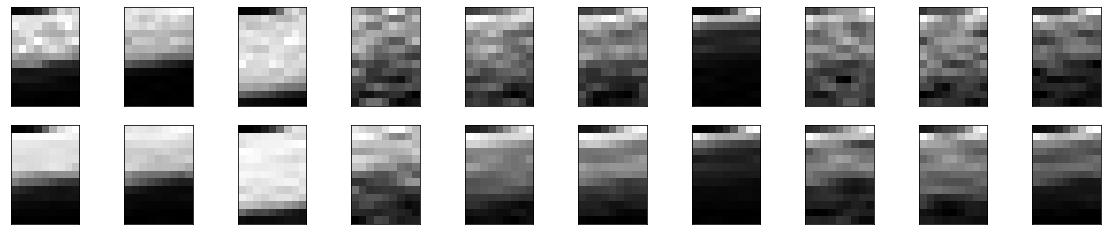

In [29]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_values[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()